## **Scraping data about nominated and awarded movies from 2010 to 2015 from the site**: https://www.scrapethissite.com/pages/ajax-javascript/#2010

## Libraries

In [57]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
import seaborn as sns
from selenium.webdriver.support import expected_conditions as EC
import matplotlib.pyplot as plt

## Code

In [33]:
film_data = []
s = Service('C:\webdrivers\chromedriver.exe')
driver = webdriver.Chrome(service=s)
for year in range(2010,2016):
    page_url = f"https://www.scrapethissite.com/pages/ajax-javascript/#{year}"
    driver.get(page_url)
    WebDriverWait(driver, 15).until(EC.presence_of_element_located((By.XPATH, '//table[@class="table"]//tbody//tr')))
    driver.refresh()
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)
    film_table = driver.find_elements(By.XPATH,'//table[@class="table"]//tbody//tr')
    driver.implicitly_wait(5)
    for film in film_table:
        film_year = year
        film_title = film.find_element(By.XPATH,'.//td[1]').text.strip()
        film_nominations = film.find_element(By.XPATH,'.//td[2]').text.strip()
        film_awards = film.find_element(By.XPATH,'.//td[3]').text.strip()
        film_data.append({"title":film_title,
                        "nominations":film_nominations,
                        "awards":film_awards,
                        "year":film_year})
        time.sleep(1)
    time.sleep(1)

In [34]:
df = pd.DataFrame(film_data)

### Data cleaning and visualization

In [35]:
df['year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015], dtype=int64)

In [36]:
df

,title,nominations,awards,year
0,The King's Speech,12,4,2010
1,Inception,8,4,2010
2,The Social Network,8,3,2010
3,The Fighter,7,2,2010
4,Toy Story 3,5,2,2010
...,...,...,...,...
82,Bear Story,1,1,2015
83,A Girl in the River: The Price of Forgiveness,1,1,2015
84,Son of Saul,1,1,2015
85,Spectre,1,1,2015


In [46]:
df.iloc[:,1:] = df.iloc[:,1:].apply(pd.to_numeric,errors="coerce")

C:\Users\piotr\AppData\Local\Temp\ipykernel_12400\1456723580.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,1:] = df.iloc[:,1:].apply(pd.to_numeric,errors="coerce")


In [47]:
df.dtypes

title          object
nominations     int64
awards          int64
year            int64
dtype: object

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60'),
  Text(0, 70.0, '70'),
  Text(0, 80.0, '80')])

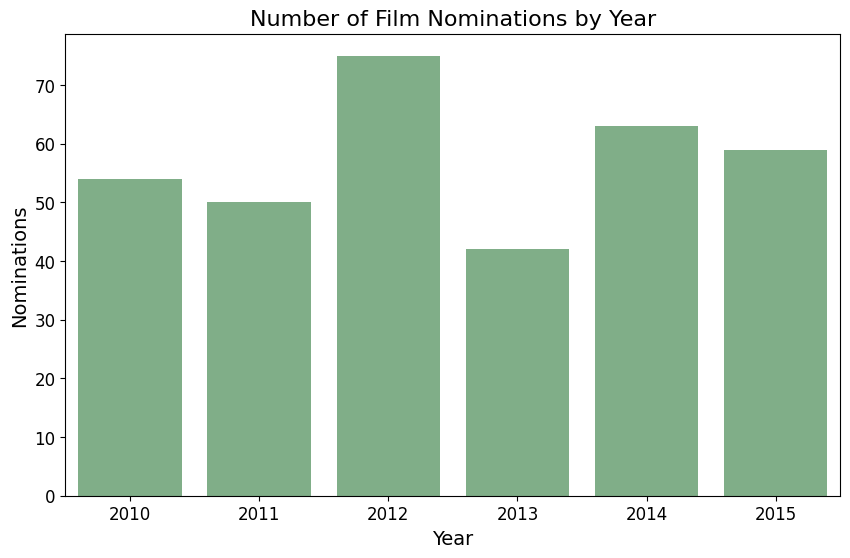

In [79]:
plt.figure(figsize=(10,6))
sns.barplot(data=df.groupby(["year"])["nominations"].sum().reset_index(),
            x="year",
            y="nominations",
            color = "#78B683")
plt.title("Number of Film Nominations by Year",fontsize=16)
plt.xlabel("Year",fontsize=14)
plt.ylabel("Nominations",fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)